# Laptop Price Prediction

In this assignment we will develop a regression model to predict laptop prices from a given data set.

This project aims to predict laptop prices based on various features and specifications using machine learning algorithms. The dataset contains information about different laptop models, their configurations, and corresponding prices.

Objective
The primary goal of this project is to leverage machine learning techniques to predict laptop prices based on their specifications.

Data Exploration: Analyzed correlations between laptop features and prices. Feature Engineering: Created new features like 'TouchScreen' and 'IPS Display'.

Preprocessing: Handled missing values, converted data types, and cleaned the dataset. Model Building: Employed regression models including Linear Regression, Decision Tree Regressor, Random Forest Regressor, AdaBoost Regressor, and XGBoost Regressor.

Model Evaluation: Assessed models using metrics like Mean Squared Error, Mean Absolute Error, and R-squared.

Hyperparameter Tuning: Optimized the Random Forest Regressor using GridSearchCV.

- Feedback,
suggestions, and contributions are highly appreciated! Feel free to open issues or pull requests for improvements or additional features.

## Analyze the data

### Get the data file

In [1]:
import pandas as pd
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### EDA

In [4]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

#### Visualizations

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings('ignore')

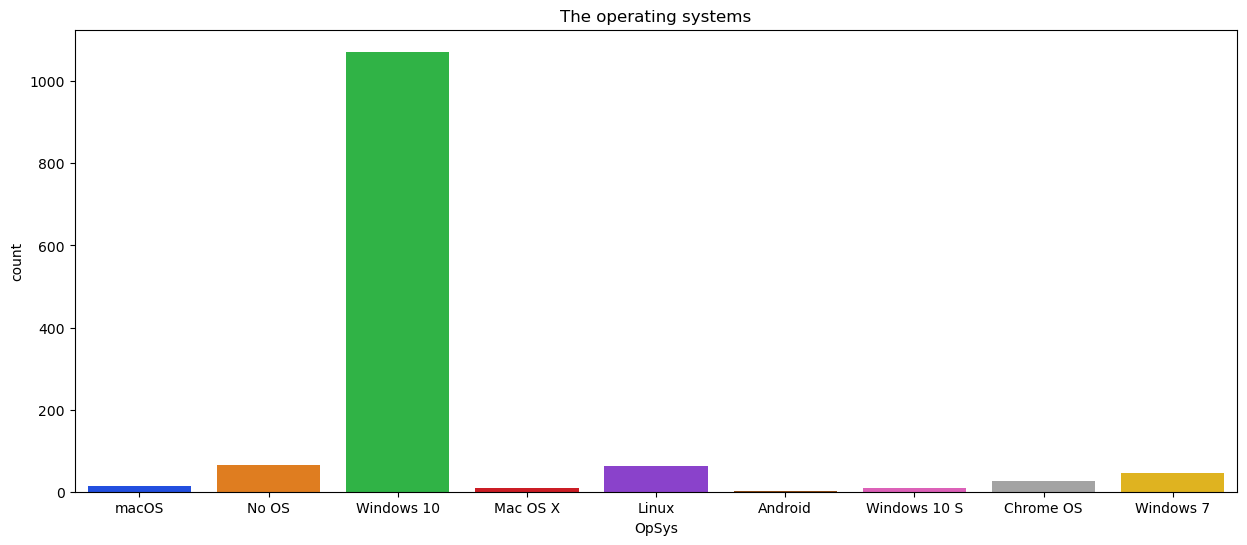

In [8]:
plt.figure(figsize=(15, 6))
sns.countplot(x=df['OpSys'], palette='bright');
plt.title("The operating systems");

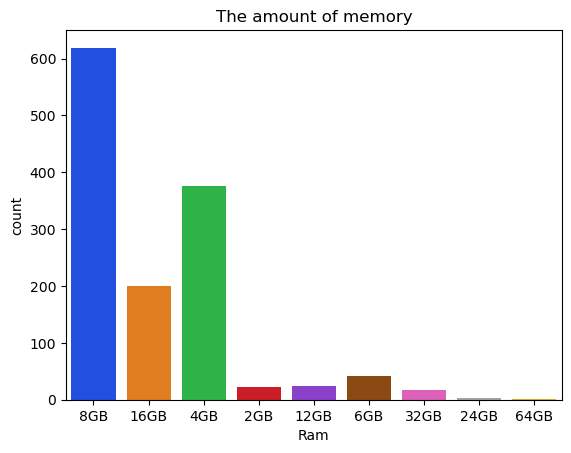

In [9]:
sns.countplot(x=df['Ram'], palette='bright');
plt.title('The amount of memory');

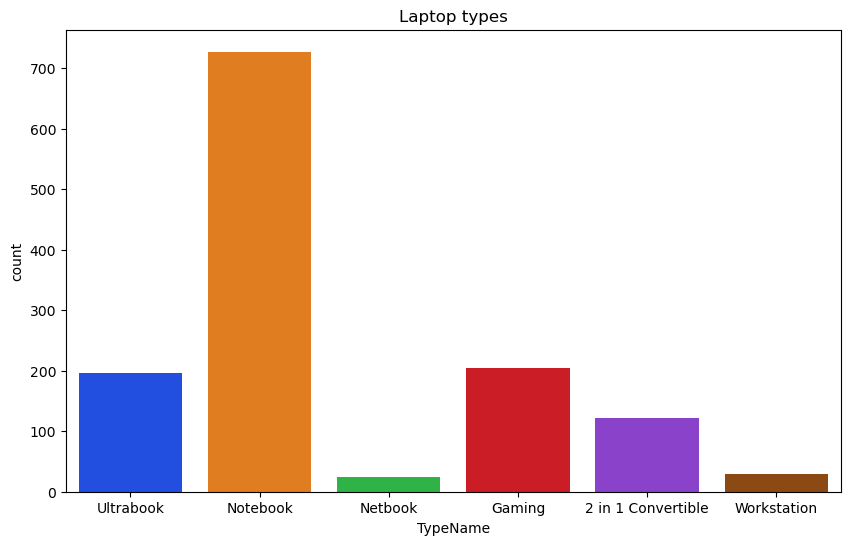

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['TypeName'], palette='bright');
plt.title('Laptop types');

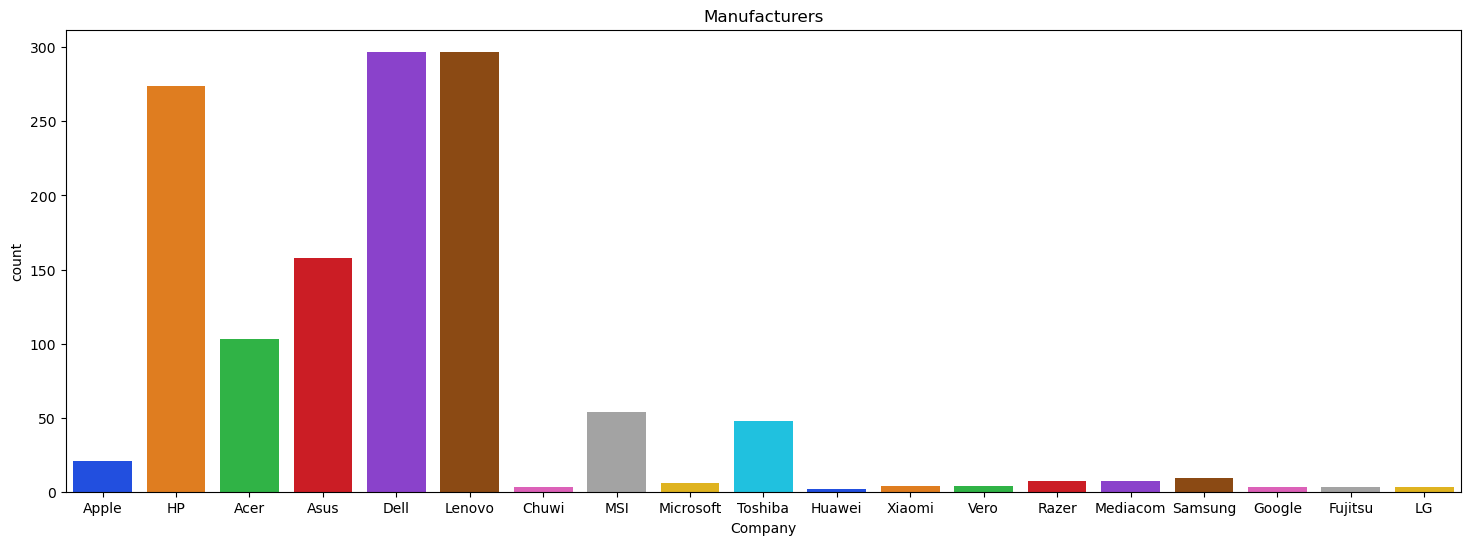

In [11]:
plt.figure(figsize=(18, 6))
sns.countplot(x=df['Company'], palette='bright');
plt.title('Manufacturers');

### Manipulating Columns

#### Removing unnecessary column

The 'Unnamed: 0' column is only there as an index and is useless for us.

In [12]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#### Touchscreen column

We will extract information from the display resolution column about if the screen is touch screen or not.

In [13]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [14]:
df['Touchscreen'] = [True if 'Touchscreen' in display else False for display in df['ScreenResolution']]

In [15]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1155,HP,Notebook,15.6,Full HD 1920x1080,AMD A6-Series A6-9220 2.5GHz,4GB,256GB SSD,AMD Radeon 520,Windows 10,1.91kg,25515.2592,False
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496,False
666,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.06kg,50882.4000,False
1287,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,False
836,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg,128884.3200,False
544,Asus,Notebook,15.6,1366x768,AMD E-Series 7110 1.8GHz,4GB,500GB HDD,AMD Radeon R2 Graphics,Windows 10,2kg,18594.7200,False
301,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg,113060.1600,False
743,Lenovo,2 in 1 Convertible,14.0,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.7kg,53226.7200,True
873,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4GB,180GB SSD,Intel HD Graphics 620,Windows 10,1.44kg,39160.8000,False
65,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,1.8kg,105654.2400,False


#### IPS Panel column

We will extract information from the display resolution column about the panel type and place it in its own column.

In [16]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [17]:
df['IpsPanel'] = [True if 'IPS Panel' in display else False for display in df['ScreenResolution']]

In [18]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel
935,HP,Netbook,12.5,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.26kg,88924.3200,False,False
423,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,Linux,2.3kg,31808.1600,False,False
299,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Nvidia GeForce 940MX,Windows 10,1.63kg,78215.0400,False,False
1092,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.7kg,85194.7200,False,True
1090,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3700 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Linux,2.2kg,20965.1472,False,False
848,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.28kg,121318.5600,True,False
16,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,39693.6000,False,False
528,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,AMD Radeon R5 M430,Windows 10,2.3kg,31168.8000,False,False
1241,Asus,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.45kg,68198.4000,False,False
1009,HP,Notebook,14.0,1366x768,Intel Core i3 7100U 2.4GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg,36443.5200,False,False


#### Retinea display column

We will extract information about weather the display is retina or not and place it in this column.

In [19]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [20]:
df['IsRetina'] = [True if "Retina" in display else False for display in df['ScreenResolution']]

In [21]:
df[df['Company'] == 'Apple']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,True,True
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,False
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,True,True
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,True,True
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016,False,True,True
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360,False,False,False
12,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,AMD Radeon Pro 555,macOS,1.83kg,130001.6016,False,True,True
14,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M m3 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,macOS,0.92kg,67260.6720,False,True,True
15,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,80908.3440,False,True,True
17,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16GB,512GB SSD,AMD Radeon Pro 560,macOS,1.83kg,152274.2400,False,True,True


#### Fix multiple mac entries in OpSys column

There are two different entries representing macOS in the OpSys column: macOS and Mac OS X. We will unify these under maxOS.

In [22]:
df['OpSys'] = ['macOS' if os == 'Mac OS X' else os for os in df['OpSys']]
df[df['Company'] == 'Apple']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,True,True
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,False
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,True,True
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,True,True
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,macOS,2.04kg,114017.6016,False,True,True
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360,False,False,False
12,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,AMD Radeon Pro 555,macOS,1.83kg,130001.6016,False,True,True
14,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M m3 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,macOS,0.92kg,67260.6720,False,True,True
15,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,80908.3440,False,True,True
17,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16GB,512GB SSD,AMD Radeon Pro 560,macOS,1.83kg,152274.2400,False,True,True


#### ScreenPixels

We will replace the ScreenResolution column with screen pixels. We will capture the 'number x number' part of the ScreenResolution column, multiply the numbers and save in the ScreenPixels column.

In [23]:
import re

In [24]:
rgx = '[0-9]+x[0-9]+' # Regex that matches the resolution

In [25]:
df['ScreenPixels'] = [re.search(rgx, d).group(0) for d in df['ScreenResolution']]

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,True,True,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,False,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,True,True,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,True,True,2560x1600


In [27]:
df[['w', 'h']] = df['ScreenPixels'].str.split('x', expand=True).astype(int)
df['ScreenPixels'] = df['w'] * df['h']
df.drop(['w', 'h'], axis=1, inplace=True)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,True,True,4096000
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,False,1296000
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,2073600
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,True,True,5184000
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,True,True,4096000


The 'ScreenResolution' column is now unnecessary. We can drop it.

In [28]:
df.drop('ScreenResolution', axis=1, inplace=True)

In [29]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,True,True,4096000
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,False,1296000
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,2073600
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,True,True,5184000
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,True,True,4096000


#### Ram

The Ram column holds categorical values representing the system memory in GB. We will convert it to int and remove the GB suffix.

In [30]:
rgx = '[0-9]+'

In [31]:
df['Ram'] = [re.search(rgx, ram).group(0) for ram in df['Ram']]
df['Ram'] = df['Ram'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Cpu           1303 non-null   object 
 4   Ram           1303 non-null   int64  
 5   Memory        1303 non-null   object 
 6   Gpu           1303 non-null   object 
 7   OpSys         1303 non-null   object 
 8   Weight        1303 non-null   object 
 9   Price         1303 non-null   float64
 10  Touchscreen   1303 non-null   bool   
 11  IpsPanel      1303 non-null   bool   
 12  IsRetina      1303 non-null   bool   
 13  ScreenPixels  1303 non-null   int64  
dtypes: bool(3), float64(2), int64(2), object(7)
memory usage: 115.9+ KB


In [32]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels
549,Lenovo,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.99kg,92121.12,False,True,False,2073600
266,Asus,2 in 1 Convertible,13.3,Intel Core i7 8550U 1.8GHz,8,512GB SSD + 512GB SSD,Intel UHD Graphics 620,Windows 10,1.1kg,79866.72,True,False,False,2073600
200,Dell,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.65kg,98301.60,False,True,False,8294400
171,HP,Notebook,17.3,Intel Core i5 7200U 2.5GHz,6,2TB HDD,AMD Radeon 520,Windows 10,2.71kg,37242.72,False,True,False,2073600
1095,Acer,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.4kg,42570.72,False,False,False,2073600


#### CPU

We will extract some data from the CPU column about the processors of the computers.

In [33]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

##### CPUSpeedGhz

We will extract the speed of the processor.

In [34]:
rgx = '[0-9]+[\.]*[0-9]*GHz'

In [35]:
df['CpuSpeedGhz'] = [re.search(rgx, c).group(0) for c in df['Cpu']]
df[['speed', '_']] = df['CpuSpeedGhz'].str.split('G', expand=True)
df['CpuSpeedGhz'] = df['speed']
df['CpuSpeedGhz'] = df['CpuSpeedGhz'].astype(float)
df.drop(['speed', '_'], axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,True,True,4096000,2.3
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,False,1296000,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,2073600,2.5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,True,True,5184000,2.7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,True,True,4096000,3.1


##### Cpu Brand

We will extract the brand of the cpu from the Cpu column and save it in a CpuBrand column.

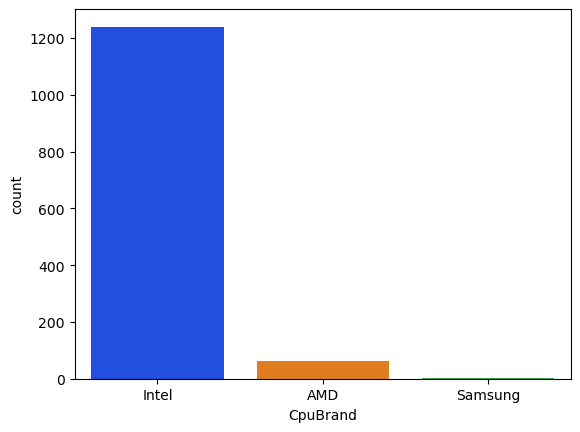

In [36]:
df['CpuBrand'] = [c.split()[0] for c in df['Cpu']]
sns.countplot(x=df['CpuBrand'], palette='bright');

#### CpuClass

We will extract information about the class of cpu from the Cpu column and assign it its own numerci column 'CpuClass'.

##### Classification criteria:

1. Intel processors:
   - Core M, Pentium, Celeron and Atom will get the class 1, since they are the least powerful.
   - Core series processros will have the class of their name. (3, 5, and 7 respectively for Core i3, i5 and i7).
   - Xeon series will have a class of 9. They are moslty found in workstation products that tend to be more expensive.
2. AMD Processors:
   - AMD E series will have a class of 1.
   - AMD A series (A4, A6, A8, A9, A10, A12) will have a class of 3.
   - AMD FX series will have a class of 3.
   - AMD Ryzen series will have a class of 5. Ryzen is the flagship series of AMD processors, but the ones here are relativly old generation, hence the low class rating.
3. Samsung:
   - Samsung has only one entry in this data, and it is a relativley low end product, especially when compared against the other cpus. It gets a class of 1.

In [37]:
cpu_classifier = {
    'Intel': 3, 
    'AMD': 2,
    'Samsung': 1
}

In [38]:
df['CpuClass'] = df['CpuBrand'].map(cpu_classifier)
df.sample(10)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuBrand,CpuClass
281,Dell,Notebook,15.6,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,22803.84,False,False,False,2073600,2.00,Intel,3
140,Acer,Notebook,17.3,Intel Core i3 7130U 2.7GHz,4,1TB HDD,Nvidia GeForce MX130,Windows 10,3kg,34898.40,False,True,False,2073600,2.70,Intel,3
901,Asus,Gaming,17.3,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 256GB SSD,Nvidia GeForce GTX 980M,Windows 10,3.58kg,68145.12,False,True,False,2073600,2.70,Intel,3
595,Lenovo,Notebook,15.6,Intel Core i3 6100U 2.3GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.29kg,24455.52,False,False,False,1049088,2.30,Intel,3
250,Dell,2 in 1 Convertible,15.6,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,2.08kg,43636.32,True,True,False,2073600,1.80,Intel,3
233,Dell,Notebook,14.0,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.6kg,45767.52,False,False,False,2073600,2.50,Intel,3
773,Dell,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62kg,58554.72,False,False,False,2073600,2.80,Intel,3
23,Dell,2 in 1 Convertible,13.3,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,43636.32,True,False,False,2073600,1.60,Intel,3
35,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3350 1.1GHz,4,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44kg,13266.72,False,False,False,1049088,1.10,Intel,3
626,Mediacom,Notebook,14.0,Intel Atom x5-Z8350 1.44GHz,2,32GB Flash Storage,Intel HD Graphics,Windows 10,1.4kg,12733.92,False,False,False,2073600,1.44,Intel,3


In [39]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [39]:
# def get_class(cpu):
#     words = cpu.split()
#     brand = words[0]
    
#     if brand == 'Intel':
#         series = words[1] # Core, Atom, Pentium, Celeron, Xeon
#         if series == 'Core':
#             model = words[2] # Core M, Core i3, Core i5, Core i7
#             if model == 'M':
#                 return 1
#             return int(model[-1])
#         if series == 'Xeon':
#             return 9

#         return 1

#     if brand == 'AMD':
#         series = words[1]
#         if series[0] == 'E':
#             return 1
#         if series[0] == 'A':
#             return 3
#         if series == 'FX':
#             return 3
#         if series == 'Ryzen':
#             return 5

#     return 1

In [40]:
# df['CpuClass'] = [get_class(cpu) for cpu in df['Cpu']]
# df.sample(10)

With that we have extracted the brand, the name and the class of the cpu from the Cpu column. We do not need this column anymore.

In [41]:
df.drop('Cpu', axis=1, inplace=True)

In [42]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuBrand,CpuClass
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,True,True,4096000,2.3,Intel,3
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,False,1296000,1.8,Intel,3
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,2073600,2.5,Intel,3
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,True,True,5184000,2.7,Intel,3
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,True,True,4096000,3.1,Intel,3


#### System Storage

In this section we will extract information about the sytsem storage from the Memory column.

##### We will rename the Memory column to Storage.

Because it makes more sense this way.

In [43]:
df['Storage'] = df['Memory']
df.drop('Memory', axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuBrand,CpuClass,Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,True,True,4096000,2.3,Intel,3,128GB SSD
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,False,1296000,1.8,Intel,3,128GB Flash Storage
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,2073600,2.5,Intel,3,256GB SSD
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,True,True,5184000,2.7,Intel,3,512GB SSD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,True,True,4096000,3.1,Intel,3,256GB SSD


##### Combine Flash storage and SSD

Flash Storage and SSD are very similiar in technology and for simplicity we can just call all flash stroage devices SSDs.

In [44]:
def flash_to_ssd(s):
    s = s.split()
    if ('Flash' in s) & ('Storage' in s):
        s.remove('Flash')
        s.remove('Storage')
        s.append('SSD')
    return ' '.join(s)

In [45]:
df['Storage'] = [flash_to_ssd(s) for s in df['Storage']]
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuBrand,CpuClass,Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,True,True,4096000,2.3,Intel,3,128GB SSD
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,False,1296000,1.8,Intel,3,128GB SSD
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,2073600,2.5,Intel,3,256GB SSD
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,True,True,5184000,2.7,Intel,3,512GB SSD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,True,True,4096000,3.1,Intel,3,256GB SSD


Comparing the Storage column with that of the above table shows that the conversion worked.

In [46]:
df['Storage'].unique()

array(['128GB SSD', '256GB SSD', '512GB SSD', '500GB HDD', '1TB HDD',
       '32GB SSD', '128GB SSD + 1TB HDD', '256GB SSD + 256GB SSD',
       '64GB SSD', '256GB SSD + 1TB HDD', '256GB SSD + 2TB HDD',
       '2TB HDD', '1.0TB Hybrid', '512GB SSD + 1TB HDD', '1TB SSD',
       '256GB SSD + 500GB HDD', '128GB SSD + 2TB HDD',
       '512GB SSD + 512GB SSD', '16GB SSD', '512GB SSD + 256GB SSD',
       '512GB SSD + 2TB HDD', '64GB + 1TB HDD SSD', '180GB SSD',
       '1TB HDD + 1TB HDD', '32GB HDD', '1TB SSD + 1TB HDD', '128GB HDD',
       '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD + 1.0TB Hybrid', '256GB SSD + 1.0TB Hybrid'],
      dtype=object)

##### Storage size

We will use the storage column to extract the size.

In [47]:
def get_size(s):
    rgx = '[0-9]+[\.]*[0]*[T|G]B'
    matches = re.findall(rgx, s)

    total_size = 0
    for match in matches:
        size = float(match[:-2]) # Remove the TB, GB suffix
        if 'TB' in match:
            size *= 1024 # Convert TB to GB
        total_size += size
    
    return total_size

In [48]:
df['StorageSize'] = [get_size(s) for s in df['Storage']]
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuBrand,CpuClass,Storage,StorageSize
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,True,True,4096000,2.3,Intel,3,128GB SSD,128.0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,False,1296000,1.8,Intel,3,128GB SSD,128.0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,2073600,2.5,Intel,3,256GB SSD,256.0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,True,True,5184000,2.7,Intel,3,512GB SSD,512.0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,True,True,4096000,3.1,Intel,3,256GB SSD,256.0


#### Fix Hybrid

Some storage devices are marked hybrid, whereas some indicate two disks together with '+'. We will mark both Hybrid.

In [49]:
df['Storage'] = [s + ' Hybrid' if ('SSD' in s) & ('HDD' in s) & ('+' in s) else s for s in df['Storage']]
df.sample(10)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuBrand,CpuClass,Storage,StorageSize
866,Toshiba,Ultrabook,13.3,8,Intel HD Graphics 520,Windows 10,1.2kg,58341.6000,False,False,False,1049088,2.3,Intel,3,256GB SSD,256.0
480,Dell,Notebook,15.6,8,Nvidia GeForce 940MX,Windows 10,2.16kg,67239.3600,False,True,False,2073600,1.8,Intel,3,512GB SSD,512.0
773,Dell,Gaming,15.6,8,Nvidia GeForce GTX 1050,Windows 10,2.62kg,58554.7200,False,False,False,2073600,2.8,Intel,3,1TB HDD,1024.0
448,MSI,Gaming,15.6,8,Nvidia GeForce GTX 1050,Windows 10,2.2kg,54757.9872,False,False,False,2073600,2.5,Intel,3,256GB SSD,256.0
1281,Dell,Notebook,15.6,8,AMD Radeon R5 M430,Linux,2.3kg,42943.1472,False,False,False,1049088,2.7,Intel,3,1TB HDD,1024.0
375,HP,Notebook,15.6,4,AMD Radeon R5,Windows 10,1.91kg,26053.3872,False,False,False,2073600,3.0,AMD,2,256GB SSD,256.0
533,Mediacom,Notebook,13.3,4,Intel HD Graphics 500,Windows 10,1.2kg,19660.3200,False,True,False,2073600,1.1,Intel,3,32GB SSD,32.0
278,Lenovo,Notebook,17.3,4,Intel HD Graphics 520,Windows 10,2.8kg,26053.9200,False,False,False,1440000,2.0,Intel,3,1TB HDD,1024.0
273,Lenovo,2 in 1 Convertible,14.0,16,Intel HD Graphics 520,Windows 10,1.36kg,133146.7200,True,False,False,3686400,2.6,Intel,3,512GB SSD,512.0
503,Lenovo,Notebook,14.0,4,Intel HD Graphics 500,Windows 10,2.1kg,15930.7200,False,False,False,1049088,1.1,Intel,3,500GB HDD,500.0


##### StorageSpeed

StorageSpeed will classify the speed of the storage device.

- Laptops with SSD storage will have 3.
- Laptops with Hybrid storage will have 2.
- Laptops with HDD storage will have 1.

In [50]:
def speed_classifier(s):
    if 'Hybrid' in s:
        return 2
    if 'SSD' in s:
        return 3
    
    return 1

In [51]:
df['StorageSpeed'] = [speed_classifier(s) for s in df['Storage']]
df.sample(10)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuBrand,CpuClass,Storage,StorageSize,StorageSpeed
982,Lenovo,Notebook,15.6,6,AMD Radeon 530,Windows 10,2.2kg,29250.720,False,False,False,2073600,3.60,AMD,2,256GB SSD,256.0,3
1258,Lenovo,Notebook,15.6,8,AMD Radeon R5 M330,Windows 7,2.32kg,47685.600,False,False,False,2073600,2.50,Intel,3,1.0TB Hybrid,1024.0,2
316,HP,2 in 1 Convertible,13.3,16,Intel UHD Graphics 620,Windows 10,1.29kg,130482.720,True,True,False,8294400,1.80,Intel,3,1TB SSD,1024.0,3
533,Mediacom,Notebook,13.3,4,Intel HD Graphics 500,Windows 10,1.2kg,19660.320,False,True,False,2073600,1.10,Intel,3,32GB SSD,32.0,3
1121,HP,Notebook,13.3,8,Intel HD Graphics 520,Windows 10,1.16kg,90043.200,False,False,False,2073600,2.30,Intel,3,256GB SSD,256.0,3
1004,Toshiba,Notebook,13.3,4,Intel HD Graphics 520,Windows 10,1.2kg,63669.600,False,False,False,2073600,2.30,Intel,3,128GB SSD,128.0,3
1038,Dell,Notebook,15.6,8,Intel HD Graphics 520,Windows 7,2.09kg,56633.976,False,False,False,2073600,2.40,Intel,3,256GB SSD,256.0,3
1126,Lenovo,2 in 1 Convertible,10.1,4,Intel HD Graphics 400,Windows 10,0.69kg,25521.120,True,True,False,2304000,1.44,Intel,3,64GB SSD,64.0,3
1263,Acer,Notebook,15.6,4,Intel HD Graphics 400,Linux,2.4kg,15397.920,False,False,False,1049088,1.60,Intel,3,500GB HDD,500.0,1
577,Lenovo,Gaming,17.3,32,Nvidia GeForce GTX 1070,Windows 10,4.6kg,141884.640,False,True,False,2073600,2.70,Intel,3,256GB SSD + 1TB HDD Hybrid,1280.0,2


And with that we extracted as much data from the storage column as we could. We can safely delete this column.

In [52]:
df.drop('Storage', axis=1, inplace=True)

In [53]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuBrand,CpuClass,StorageSize,StorageSpeed
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,True,True,4096000,2.3,Intel,3,128.0,3
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,False,1296000,1.8,Intel,3,128.0,3
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,2073600,2.5,Intel,3,256.0,3
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,True,True,5184000,2.7,Intel,3,512.0,3
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,True,True,4096000,3.1,Intel,3,256.0,3


#### WeightKg

We will remove the 'kg' suffix from the weight column and save the results in a WeightKg column as float.

In [54]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [55]:
df['WeightKg'] = [float(w[:-2]) for w in df['Weight']]
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuBrand,CpuClass,StorageSize,StorageSpeed,WeightKg
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,False,True,True,4096000,2.3,Intel,3,128.0,3,1.37
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,False,False,False,1296000,1.8,Intel,3,128.0,3,1.34
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,False,False,False,2073600,2.5,Intel,3,256.0,3,1.86
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,False,True,True,5184000,2.7,Intel,3,512.0,3,1.83
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,False,True,True,4096000,3.1,Intel,3,256.0,3,1.37


And we can now remove the weight column as well.

In [56]:
df.drop('Weight', axis=1, inplace=True)

In [57]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuBrand,CpuClass,StorageSize,StorageSpeed,WeightKg
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,71378.6832,False,True,True,4096000,2.3,Intel,3,128.0,3,1.37
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,47895.5232,False,False,False,1296000,1.8,Intel,3,128.0,3,1.34
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,30636.0000,False,False,False,2073600,2.5,Intel,3,256.0,3,1.86
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,135195.3360,False,True,True,5184000,2.7,Intel,3,512.0,3,1.83
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,96095.8080,False,True,True,4096000,3.1,Intel,3,256.0,3,1.37


#### Gpu

In this section we will extract information out of the gpu column.

In [58]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

#### GpuBrand

We will extract the names of the Gpu brand from the Gpu column.

In [59]:
df['GpuBrand'] = [gpu.split()[0] for gpu in df['Gpu']]
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuBrand,CpuClass,StorageSize,StorageSpeed,WeightKg,GpuBrand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,71378.6832,False,True,True,4096000,2.3,Intel,3,128.0,3,1.37,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,47895.5232,False,False,False,1296000,1.8,Intel,3,128.0,3,1.34,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,30636.0000,False,False,False,2073600,2.5,Intel,3,256.0,3,1.86,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,135195.3360,False,True,True,5184000,2.7,Intel,3,512.0,3,1.83,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,96095.8080,False,True,True,4096000,3.1,Intel,3,256.0,3,1.37,Intel


#### GpuClass

A numeric classification on the quality of the GPU. A better GPU will have a higher score.

##### Classification criteria:

- All of Intel graphichs, ARM Mali and AMD FirePro and R series will get a score of 1.
- AMD Radeon and Nvidia GeForce series will get a score of 2.
- Nvidia GeForxe GTX and AMD Radeon Pro & Radeon RX series will get a score of 3.
- Nvidia SLI gpus will get a score of 4.
- Nvidia Quadro series will get a score of 4.

In [60]:
gpu_classifier = {
    'Nvidia': 4,
    'AMD': 3,
    'Intel': 2,
    'ARM': 1
}

In [61]:
df['GpuClass'] = df['GpuBrand'].map(gpu_classifier)

In [62]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuBrand,CpuClass,StorageSize,StorageSpeed,WeightKg,GpuBrand,GpuClass
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,71378.6832,False,True,True,4096000,2.3,Intel,3,128.0,3,1.37,Intel,2
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,47895.5232,False,False,False,1296000,1.8,Intel,3,128.0,3,1.34,Intel,2
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,30636.0000,False,False,False,2073600,2.5,Intel,3,256.0,3,1.86,Intel,2
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,135195.3360,False,True,True,5184000,2.7,Intel,3,512.0,3,1.83,AMD,3
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,96095.8080,False,True,True,4096000,3.1,Intel,3,256.0,3,1.37,Intel,2


In [63]:
# def classify_gpus(gpu):
#     gpu = gpu.split()
#     brand = gpu[0]

#     if brand == 'Intel' or brand == 'ARM':
#         return 1
#     if brand == 'AMD':
#         if 'Radeon' not in gpu:
#             return 1
#         if 'Pro' in gpu or 'RX' in gpu:
#             return 3
#         return 2
#     if brand == 'Nvidia':
#         if 'Quadro' in gpu or 'SLI' in gpu:
#             return 4
#         if 'GTX' in gpu:
#             return 3
#         return 2

In [64]:
# df['GpuClass'] = [classify_gpus(gpu) for gpu in df['Gpu']]
# df.sample(10)

And with that the gpu column can be safely removed.

In [65]:
df.drop('Gpu', axis=1, inplace=True)

In [66]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuBrand,CpuClass,StorageSize,StorageSpeed,WeightKg,GpuBrand,GpuClass
0,Apple,Ultrabook,13.3,8,macOS,71378.6832,False,True,True,4096000,2.3,Intel,3,128.0,3,1.37,Intel,2
1,Apple,Ultrabook,13.3,8,macOS,47895.5232,False,False,False,1296000,1.8,Intel,3,128.0,3,1.34,Intel,2
2,HP,Notebook,15.6,8,No OS,30636.0000,False,False,False,2073600,2.5,Intel,3,256.0,3,1.86,Intel,2
3,Apple,Ultrabook,15.4,16,macOS,135195.3360,False,True,True,5184000,2.7,Intel,3,512.0,3,1.83,AMD,3
4,Apple,Ultrabook,13.3,8,macOS,96095.8080,False,True,True,4096000,3.1,Intel,3,256.0,3,1.37,Intel,2


#### Operating system

The operating system data is too crowded. We will split it into macOS, Windows, No OS and Other.

In [67]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Linux', 'Android', 'Windows 10 S',
       'Chrome OS', 'Windows 7'], dtype=object)

In [68]:
df['OpSys'] = [os if os == 'macOS' or os == 'No OS' else 'Windows' for os in df['OpSys']]
df.sample(10)

,Company,TypeName,Inches,Ram,OpSys,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuBrand,CpuClass,StorageSize,StorageSpeed,WeightKg,GpuBrand,GpuClass
867,Lenovo,2 in 1 Convertible,13.3,8,Windows,103896.000,True,True,False,2073600,2.7,Intel,3,256.0,3,1.37,Intel,2
357,Dell,Gaming,15.6,8,Windows,53226.720,False,False,False,2073600,2.5,Intel,3,1024.0,1,2.65,Nvidia,4
299,Asus,Ultrabook,15.6,16,Windows,78215.040,False,False,False,2073600,2.7,Intel,3,512.0,3,1.63,Nvidia,4
842,HP,Notebook,17.3,8,Windows,48484.800,False,False,False,1440000,2.5,Intel,3,1024.0,1,2.63,Nvidia,4
506,Asus,Notebook,15.6,8,Windows,65214.720,False,False,False,2073600,2.7,Intel,3,1280.0,2,2.00,Intel,2
48,Dell,Notebook,15.6,4,Windows,34045.920,False,False,False,2073600,2.5,Intel,3,256.0,3,2.30,AMD,3
194,Dell,2 in 1 Convertible,13.3,8,Windows,44701.920,True,True,False,2073600,1.8,Intel,3,1024.0,1,1.62,Intel,2
254,Acer,Notebook,17.3,4,Windows,37402.560,False,True,False,2073600,2.7,Intel,3,256.0,3,3.00,Nvidia,4
1100,Dell,Ultrabook,12.5,4,Windows,60480.792,False,False,False,1049088,2.3,Intel,3,500.0,1,1.50,Intel,2
765,Acer,Notebook,13.3,4,Windows,34898.400,False,False,False,1049088,2.3,Intel,3,128.0,3,1.60,Intel,2


### Modelling

### Get dummies

In [69]:
_df = df # Save df before get_dummies

In [70]:
df = pd.get_dummies(df, drop_first=True)

In [71]:
df.head()

,Inches,Ram,Price,Touchscreen,IpsPanel,IsRetina,ScreenPixels,CpuSpeedGhz,CpuClass,StorageSize,StorageSpeed,WeightKg,GpuClass,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OpSys_Windows,OpSys_macOS,CpuBrand_Intel,CpuBrand_Samsung,GpuBrand_ARM,GpuBrand_Intel,GpuBrand_Nvidia
0,13.3,8,71378.6832,False,True,True,4096000,2.3,3,128.0,3,1.37,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,True,False
1,13.3,8,47895.5232,False,False,False,1296000,1.8,3,128.0,3,1.34,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,True,False
2,15.6,8,30636.0000,False,False,False,2073600,2.5,3,256.0,3,1.86,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,15.4,16,135195.3360,False,True,True,5184000,2.7,3,512.0,3,1.83,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False
4,13.3,8,96095.8080,False,True,True,4096000,3.1,3,256.0,3,1.37,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,True,False


In [72]:
x = df.drop('Price', axis=1)
y = df['Price']

In [73]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [74]:
def test_models(models, x, y):
    x_train, x_test, y_train, y_test = tts(x, y, random_state=42, test_size=.2)
    for model in models:
        pred = model.fit(x_train, y_train).predict(x_test)
        print(f'R2 score of {str(model)[:-2]} is {r2_score(y_test, pred)}')
        print(f'RMSE of {str(model)[:-2]} is {mse(y_test, pred)}')
        print()

In [75]:
gbr = GBR()
rfr = RFR()
lr = LR()
r = Ridge()
l = Lasso()
en = ElasticNet()

In [76]:
test_models([gbr, rfr, lr, r, l, en], x, y)

R2 score of GradientBoostingRegressor is 0.8224866571692122
RMSE of GradientBoostingRegressor is 255953061.02598548

R2 score of RandomForestRegressor is 0.791631782143412
RMSE of RandomForestRegressor is 300442109.47997063

R2 score of LinearRegression is 0.7498408306063695
RMSE of LinearRegression is 360699675.4663819

R2 score of Ridge is 0.7466898925580203
RMSE of Ridge is 365242952.189794

R2 score of Lasso is 0.7498198649734251
RMSE of Lasso is 360729905.40765226

R2 score of ElasticNet is 0.6708486453007357
RMSE of ElasticNet is 474596982.02198905



### More optimizations

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
def try_gridsearch(params, model):
    x_train, x_test, y_train, y_test = tts(x, y, random_state=42, test_size=.2)
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    pred = best_model.predict(x_test)
    print(f'Best params is {grid_search.best_params_}')
    print(f"R2 score: {r2_score(y_test, pred)}")
    print(f'RMSE: {mse(y_test, pred) ** 0.5}')

In [79]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [80]:
try_gridsearch(param_grid, gbr)

Best params is {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
R2 score: 0.8328022860259157
RMSE: 15526.723897365759


In [81]:
param_grid = {
    'n_estimators': [80, 90, 100],
    'learning_rate': [0.01, 0.1, 0.15],
    'max_depth': [1, 2, 3]
}
try_gridsearch(param_grid, gbr)

Best params is {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 100}
R2 score: 0.8041380851069461
RMSE: 16805.044265011493


In [82]:
param_grid = {
    'n_estimators': [60, 70, 80],
    'learning_rate': [0.1, 0.15, 0.155, 0.17],
    'max_depth': [1, 2, 3]
}
try_gridsearch(param_grid, gbr)

Best params is {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 80}
R2 score: 0.8020171012786093
RMSE: 16895.78995999474


In [83]:
param_grid = {
    'n_estimators': [40, 50, 600],
    'learning_rate': [0.1, 0.15, 0.155, 0.17],
    'max_depth': [1, 2, 3]
}
try_gridsearch(param_grid, gbr)

Best params is {'learning_rate': 0.155, 'max_depth': 2, 'n_estimators': 600}
R2 score: 0.7933877540428802
RMSE: 17260.075535990913


This was the best one yet!

In [84]:
param_grid = {
    'n_estimators': [40, 50, 600, 800],
    'learning_rate': [0.1, 0.15, 0.155, 0.17, 0.2, 0.25],
    'max_depth': [1, 2, 3]
}
try_gridsearch(param_grid, gbr)

Best params is {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 600}
R2 score: 0.7936882073215155
RMSE: 17247.52126329379


In [85]:
param_grid = {
    'n_estimators': [40, 50, 500],
    'learning_rate': [0.1, 0.15, 0.155, 0.17],
    'max_depth': [1, 2, 3]
}
try_gridsearch(param_grid, gbr)

Best params is {'learning_rate': 0.155, 'max_depth': 2, 'n_estimators': 500}
R2 score: 0.7973497012621416
RMSE: 17093.786950899714


In [86]:
param_grid = {
    'n_estimators': [30, 40, 50],
    'learning_rate': [0.1, 0.15, 0.155, 0.17, 0.2, 0.25],
    'max_depth': [0, 1, 2, 3, 4, 5]
}
try_gridsearch(param_grid, gbr)

Best params is {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
R2 score: 0.7978896933225061
RMSE: 17070.99728190544


In [87]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'learning_rate': [0.1, 0.15, 0.155, 0.17, 0.2, 0.25],
    'max_depth': [0, 1, 2, 3, 4, 5]
}
try_gridsearch(param_grid, gbr)

Best params is {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
R2 score: 0.8147767673285249
RMSE: 16342.270414473767


## Conclusion

We have used the GradientBoostingRegressor model from sklearn.ensemble to predict the laptop prices in the dataset with an accuracy of approximately 83%. We were able to get this accuracy up to 86% with hyperparameter tuning using GridSearchCV.

<br>

The paramter ranges specified to get this result are as follows:

- n_estimators: 40, 50, 600
- learning_rate: 0.1, 0.15, 0.155, 0.17
- max_depth: 1, 2, 3

<br>

Here are the optimum values found by the model:

- n_estimators: 600
- learning_rate: 0.17
- max_depth: 2
